[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/philschmid/gemini-2.5-ai-engineering-workshop/blob/main/notebooks/02-multimodal-capabilities.ipynb)

# Part 2 - Multimodal Capabilities (Images, Audio, Video, Documents)

Gemini models like `gemini-2.5-flash-preview-05-20` can process text, images, audio, video, and documents in a single prompt using `client.models.generate_content()`. This enables powerful multimodal AI applications that can understand and generate content across different media types.

**Key Capabilities:**
- **Visual Understanding**: Analyze images, extract text, identify objects
- **Audio Processing**: Transcribe speech, analyze music, understand audio content
- **Video Analysis**: Summarize videos, extract key frames, understand motion
- **Document Processing**: Extract information from PDFs, understand layouts
- **Multimodal Generation**: Create images and speech from text prompts

In [1]:
%pip install pillow

In [2]:
from google import genai
from google.genai import types
import os
import sys
import requests
from PIL import Image
from io import BytesIO

IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    from google.colab import userdata
    GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')
else:
    GEMINI_API_KEY = os.environ.get('GEMINI_API_KEY',None)

# Create client with api key
MODEL_ID = "gemini-2.5-flash-preview-05-20"
client = genai.Client(api_key=GEMINI_API_KEY)

## 1. Image Understanding: Single Image

Gemini can analyze images in multiple formats: PIL `Image` objects, raw bytes, or uploaded files via the File API.

**When to use each method:**
- **Raw bytes**: When working with image data from APIs or memory
- **File API**: Large images (>20MB), when you want to reuse images across multiple requests

In [3]:
!curl -o image.jpg "https://storage.googleapis.com/generativeai-downloads/images/Cupcakes.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1582k  100 1582k    0     0  4564k      0 --:--:-- --:--:-- --:--:-- 4572k


In [4]:
with open('image.jpg', 'rb') as f:
    image_bytes = f.read()

prompt_specific = "Are there any fruits visible?"

response_specific = client.models.generate_content(
    model=MODEL_ID,
    contents=["What is this image?",
            types.Part.from_bytes(data=image_bytes, mime_type="image/jpeg")]
)
print(response_specific.text)

NameError: name 'client' is not defined

You can use the File API for large payloads (>20MB).

> The File API lets you store up to 20 GB of files per project, with a per-file maximum size of 2 GB. Files are stored for 48 hours. They can be accessed in that period with your API key, but cannot be downloaded from the API. It is available at no cost in all regions where the Gemini API is available.

In [5]:
file_id = client.files.upload(file="../assets/data/Cupcakes.jpg")

response = client.models.generate_content(
    model=MODEL_ID,
    contents=["What is this image?", file_id]
)

print(response.text)

NameError: name 'client' is not defined

> The File API lets you store up to 20 GB of files per project, with a per-file maximum size of 2 GB. Files are stored for 48 hours. They can be accessed in that period with your API key, but cannot be downloaded from the API. It is available at no cost in all regions where the Gemini API is available.

## 2. Image Understanding: Multiple Images

Gemini can analyze and compare multiple images simultaneously, which is powerful for comparative analysis, visual storytelling, or understanding sequences.

In [12]:
image_url_1 = "https://plus.unsplash.com/premium_photo-1694819488591-a43907d1c5cc?fm=jpg&q=60&w=3000&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y3V0ZSUyMGRvZ3xlbnwwfHwwfHx8MA%3D%3D" # Dog
image_url_2 = "https://images.pexels.com/photos/2071882/pexels-photo-2071882.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500" # Cat

image_response_req_1 = requests.get(image_url_1)
image_response_req_2 = requests.get(image_url_2)


# TODO: Call client.models.generate_content() to compare the two images.
# The contents should be a list containing:
# 1. A text part: "Compare these two images. What are the main subjects in each, and what are they doing?"
# 2. A text part: "Image 1:"
# 3. Image 1 bytes as a Part: types.Part.from_bytes(data=image_response_req_1.content, mime_type="image/jpeg")
# 4. A text part: "Image 2:"
# 5. Image 2 bytes as a Part: types.Part.from_bytes(data=image_response_req_2.content, mime_type="image/jpeg")
response_multi = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        types.Part.from_bytes(data=image_response_req_1.content, mime_type="image/jpeg"),
        types.Part.from_bytes(data=image_response_req_2.content, mime_type="image/jpeg"),
        "what do you see in each?"
    ]
)
print(response_multi.text)

Here's what I see in each image:

**Image 1:**
*   A **golden retriever puppy** is featured prominently in the center of the frame.
*   It has fluffy, light golden or blonde fur, dark eyes, and a dark nose.
*   The puppy is sitting upright, looking directly at the viewer with an alert and curious expression.
*   Around its neck, it wears a bright **orange or peach-colored collar** with a metal buckle.
*   The background is a soft, draped **white fabric**, suggesting a studio setting or a clean, controlled environment.
*   The lighting is soft and even, highlighting the puppy's endearing features.

**Image 2:**
*   A **tabby cat** is shown in a close-up portrait, focusing on its head and upper body.
*   The cat has short, striped fur in shades of brown, grey, and black, typical of a mackerel tabby pattern.
*   Its most striking feature are its large, expressive **greenish-yellow eyes**, which are looking directly at the viewer.
*   Long white whiskers fan out from its nose, and its ears

## 3. !! Exercise: Product Description from Image !!

Use Gemini to analyze an image of a product and generate a detailed description, including features, use cases, and a marketing slogan.

Tasks:
- Find an image URL of a product (e.g., a backpack, a mug, a piece of electronics).
- Use the `requests` library to get the image content from the URL.
- Create a `types.Part` object from the image bytes.
- Create a text `types.Part` object containing a prompt that asks the model about the Product.
- Call `client.models.generate_content()` with the `MODEL_ID` and a list containing your text prompt part and the image part.

In [ ]:
# TODO:

## 4. Audio Understanding

Gemini can process audio files for transcription, content analysis, speaker identification, and audio summarization. This is particularly useful for podcasts, meetings, interviews, and voice memos.

**Supported audio formats**: MP3, WAV, FLAC, AAC, and other common formats

In [4]:
!pip install yt-dlp pydub -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 62.4 MB/s eta 0:00:00


In [6]:
from pydub import AudioSegment
import os

youtube_url = "https://www.youtube.com/watch?v=furFAnmbam0"
audio_filename = "youtube_audio.mp3"
trimmed_audio_filename = "trimmed_youtube_audio.mp3"

# Download the audio using yt-dlp
os.system(f'yt-dlp -x --audio-format mp3 -o "{audio_filename}" {youtube_url}')

# Trim the first 60 seconds using pydub
audio = AudioSegment.from_file(audio_filename)
trimmed_audio = audio[:60000]  # 60 seconds in milliseconds
trimmed_audio.export(trimmed_audio_filename, format="mp3")

FileNotFoundError: [Errno 2] No such file or directory: 'youtube_audio.mp3'

In [7]:
# Upload the trimmed audio to the File API
file_id = client.files.upload(file=trimmed_audio_filename)

# You might want to remove the temporary files after uploading
os.remove(audio_filename)
os.remove(trimmed_audio_filename)

FileNotFoundError: trimmed_youtube_audio.mp3 is not a valid file path.

In [10]:
# Generate a structured response using the Gemini API
prompt = """Generate a transcript of the episode. Include timestamps and identify speakers.

Speakers:
- John

eg:
[00:00] Brady: Hello there.
[00:02] Tim: Hi Brady.

It is important to include the correct speaker names. Use the names you identified earlier. If you really don't know the speaker's name, identify them with a letter of the alphabet, eg there may be an unknown speaker 'A' and another unknown speaker 'B'.

If there is music or a short jingle playing, signify like so:
[01:02] [MUSIC] or [01:02] [JINGLE]

If you can identify the name of the music or jingle playing then use that instead, eg:
[01:02] [Firework by Katy Perry] or [01:02] [The Sofa Shop jingle]

If there is some other sound playing try to identify the sound, eg:
[01:02] [Bell ringing]

Each individual caption should be quite short, a few short sentences at most.

Signify the end of the episode with [END].

Don't use any markdown formatting, like bolding or italics.

Only use characters from the English alphabet, unless you genuinely believe foreign characters are correct.

It is important that you use the correct words and spell everything correctly. Use the context of the podcast to help.
If the hosts discuss something like a movie, book or celebrity, make sure the movie, book, or celebrity name is spelled correctly."""
audio_part = types.Part.from_uri(file_uri=file_id.uri, mime_type=file_id.mime_type)

helper_prompt = "BTW, it's swyx not wix, and Alessio not Alesio"

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[prompt, helper_prompt, audio_part]
)
print(response.text)

[00:00] [MUSIC]
[00:03] Alessio: Hey everyone.
[00:04] Alessio: Welcome to a Lightning Plus emergency news, latest base podcast episode.
[00:09] Alessio: I'm Alessio, partner and CTO at Decibel, and joined by my co-host Swyx, founder of Small AI.
[00:14] Swyx: Hey, hey.
[00:15] Swyx: And, uh, yeah, honestly, we knew that Claude 4 was coming and we just didn't, we just were too busy to like have a dedicated episode.
[00:23] Swyx: So like this is our makeup dedicated episode with a special guest, Will Brown from, now I can say it, Prime Intellect.
[00:30] Will Brown: Hey, how's it going?
[00:31] Will Brown: Great to be on, uh, and uh, so excited we've known each other for a little bit.
[00:35] Will Brown: And, uh, this is my first time on the podcast, I believe.
[00:38] Will Brown: Great to, um, chat with you guys.
[00:41] Will Brown: Big news day, I guess.
[00:42] Will Brown: So lots of stuff out in the world.
[00:46] Will Brown: There's always a new day.
[00:48] Swyx: I think this week

## 5. Video Understanding

Gemini can process video files to understand their content, analyze scenes, identify objects and actions, and provide detailed summaries.

**Video capabilities:**
- Scene analysis and summarization
- Object and action recognition
- Temporal understanding (what happens when)
- Content extraction and key moments
- YouTube video analysis

In [ ]:
from time import sleep

video_path = "../assets/data/standup.mp4"

video_file_id = client.files.upload(file=video_path)
def wait_for_file_ready(file_id):
    while file_id.state == "PROCESSING":
        sleep(1)
        file_id = client.files.get(name=file_id.name)
        wait_for_file_ready(file_id)
    return file_id

video_file_id = wait_for_file_ready(video_file_id)


prompt = "Describe the main events in this video. What is the primary subject?"
video_part = types.Part.from_uri(file_uri=video_file_id.uri, mime_type=video_file_id.mime_type)



# TODO: Call client.models.generate_content() to analyze the video.
# The contents should be a list containing the prompt and video_part.
# response = client.models.generate_content(
#     model=MODEL_ID,
#     contents=[..., ...]
# )
# print(response.text)

### YouTube Video Analysis

The Gemini API supports direct YouTube URL analysis, which is very convenient for content analysis:

In [ ]:
# Analyze a YouTube video directly
youtube_url = "https://www.youtube.com/watch?v=dwgmfSOZNoQ"  # Google Cloud Next '25 Opening Keynote

youtube_part = genai.types.Part(
    file_data=genai.types.FileData(file_uri=youtube_url)
)
prompt = "What was the biggest Gemini announcement in this video?"

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[prompt, youtube_part]
)

print(response.text)

## 6. !! Exercise: Summarize a YouTube Video !!

Analyze a YouTube video using its URL and generate a summary or transcript.

Tasks:
- Find a YouTube video URL (e.g., a tutorial, news segment, or educational video).
- Create a `genai.types.Part` object from the YouTube URL. You can use `genai.types.Part(file_data=genai.types.FileData(file_uri=youtube_url))` for this.
- Define a prompt asking the model to perform a task, such as summarizing the video.
- Call `client.models.generate_content()` with the `MODEL_ID`, your prompt, and the YouTube video part.

In [ ]:
# TODO:

**Try these variations:**
- Analyze a tutorial video and extract step-by-step instructions
- Summarize a news video and identify key facts vs. opinions
- Analyze a product review and extract pros/cons
- Process an educational video and create study notes

## 7. Working with PDF/Document Files

Gemini can extract information from PDFs and other document formats, making it excellent for document analysis, data extraction, and content summarization.

**Common use cases:**
- Invoice processing and data extraction
- Contract analysis and summarization
- Research paper analysis
- Form processing and validation
- Document classification and routing

In [ ]:
pdf_file_path = "../assets/data/rewe_invoice.pdf"

pdf_file_id = client.files.upload(file=pdf_file_path)

prompt = "What is the total amount due?"
pdf_part = types.Part.from_uri(file_uri=pdf_file_id.uri, mime_type=pdf_file_id.mime_type)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[prompt, pdf_part]
)
print(response.text)

## 7. Code

Gemini is good at understanding and generating code. Let's use [gitingest](https://github.com/cyclotruc/gitingest) to chat with a GitHub repo:

In [15]:
%pip install gitingest -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.0/236.0 kB 9.0 MB/s eta 0:00:00


In [16]:
from gitingest import ingest_async

summary, tree, content = await ingest_async("https://github.com/cyclotruc/gitingest")

In [17]:
print(summary)

Repository: cyclotruc/gitingest
Files analyzed: 65

Estimated tokens: 56.4k


In [18]:
print(content[:500])

File: README.md
# Gitingest

[![Image](./docs/frontpage.png "Gitingest main page")](https://gitingest.com)

[![License](https://img.shields.io/badge/license-MIT-blue.svg)](https://github.com/cyclotruc/gitingest/blob/main/LICENSE)
[![PyPI version](https://badge.fury.io/py/gitingest.svg)](https://badge.fury.io/py/gitingest)
[![GitHub stars](https://img.shields.io/github/stars/cyclotruc/gitingest?style


In [19]:
print(tree)

Directory structure:
└── cyclotruc-gitingest/
    ├── README.md
    ├── CODE_OF_CONDUCT.md
    ├── CONTRIBUTING.md
    ├── Dockerfile
    ├── LICENSE
    ├── SECURITY.md
    ├── pyproject.toml
    ├── requirements-dev.txt
    ├── requirements.txt
    ├── .dockerignore
    ├── .pre-commit-config.yaml
    ├── docs/
    ├── src/
    │   ├── gitingest/
    │   │   ├── __init__.py
    │   │   ├── cli.py
    │   │   ├── cloning.py
    │   │   ├── config.py
    │   │   ├── entrypoint.py
    │   │   ├── ingestion.py
    │   │   ├── output_formatters.py
    │   │   ├── query_parsing.py
    │   │   ├── schemas/
    │   │   │   ├── __init__.py
    │   │   │   ├── filesystem_schema.py
    │   │   │   └── ingestion_schema.py
    │   │   └── utils/
    │   │       ├── __init__.py
    │   │       ├── exceptions.py
    │   │       ├── file_utils.py
    │   │       ├── git_utils.py
    │   │       ├── ignore_patterns.py
    │   │       ├── ingestion_utils.py
    │   │       ├── notebook_utils.py
    │ 

In [20]:
prompt = f"""Using gitingest are there ways to just pull the context from specific folders?:

Code:
{content}
"""

chat = client.chats.create(model=MODEL_ID)

response = chat.send_message(prompt)
print(response.text)

Yes, `gitingest` provides ways to pull context from specific folders using its filtering capabilities.

You can achieve this using either the **CLI tool** or the **Python package**.

### 1. Using the CLI Tool

The `gitingest` CLI offers an `--include-pattern` (or `-i`) option, which allows you to specify patterns for files and directories that *should* be included in the digest. When you use include patterns, only files and directories matching these patterns will be processed.

To pull context from specific folders, you can use wildcards (`*`) with the folder paths. Directories are matched with a trailing slash.

**Syntax:**

```bash
gitingest <source> --include-pattern "path/to/folder/*"
```

You can specify multiple include patterns by repeating the `-i` option:

```bash
gitingest <source> -i "src/*" -i "docs/api/*"
```

**Examples:**

*   **To include only the `src` directory and its entire contents:**
    ```bash
    gitingest https://github.com/cyclotruc/gitingest -i "src/*"
    

In [9]:
response = chat.send_message("How are the schemas defined?")
print(response.text)

The schemas in this repository, particularly for the MCP (Multi-Component Protocol) agents, are defined and managed in a multi-step process:

1.  **Source of Truth: MCP Tool Servers (JSON-RPC)**
    *   The primary definition of the tools and their input schemas comes from the **MCP tool servers** themselves.
    *   As seen in `mcp-agent-fine-tune/config.json`, a server like `playwright` is launched using `npx @playwright/mcp@latest`.
    *   When the `MCPAgent` starts (`_discover_all_tools` method in `agent.py`), it makes a JSON-RPC call (`{"method": "tools/list"}`) to these running MCP servers.
    *   These servers are expected to return a list of available tools, each containing a `name`, `description`, and an `inputSchema`.
    *   The `inputSchema` for each MCP tool is defined using **JSON Schema**.

2.  **Internal Representation for Tool Calls (`MCPToolCall` Pydantic Model)**
    *   In `mcp-agent-fine-tune/agent.py`, there's a Pydantic `BaseModel` called `MCPToolCall`.
    *  

In [10]:
response = chat.send_message("Update all schema route to use the new Gemini 2.5 models, `gemini-2.5-flash-preview-05-20`. Return only the updated file.")
print(response.text)

```python
#!/usr/bin/env python3
"""
Updated MCP agent script
------------------------------------------------
* Uses the official `openai` client.
* Converts MCP tool schemas → OpenAI function-calling schemas.
* Requires:   uv add openai click rich python-dotenv pydantic OR uv sync
"""

from __future__ import annotations

import uuid
import json
import os
import subprocess
import datetime
from pathlib import Path
from typing import Any, Dict, List, Optional, Tuple

import click
from dotenv import load_dotenv
from openai import OpenAI
from pydantic import BaseModel
from rich.console import Console
from rich.prompt import Confirm

console = Console()
load_dotenv()                       # .env support, e.g. for OpenAI api key.

# -----------------------------------------------------------------------------#
#  Models                                                                      #
# -----------------------------------------------------------------------------#
class MCPToolCall(Bas

## 9. Image Generation

Generate high-quality images using Gemini's image generation capabilities. This feature is perfect for creating visual content, prototypes, marketing materials, and creative projects.

**Image Generation Features:**
- Text-to-image generation
- Style control through prompts
- High-resolution output
- SynthID watermarking for authenticity
- Multiple aspect ratios and sizes

Text response: I will generate a photorealistic image of a domestic shorthair cat. The feline will have soft, grey tabby fur with subtle stripes and markings, bright green eyes that are slightly wide open and alert, and delicate pink nose and ear interiors. The cat will be sitting upright, perhaps with its front paws neatly tucked underneath its chest, against a slightly blurred background that suggests an indoor setting with warm, natural light. The overall mood will be calm and observant.



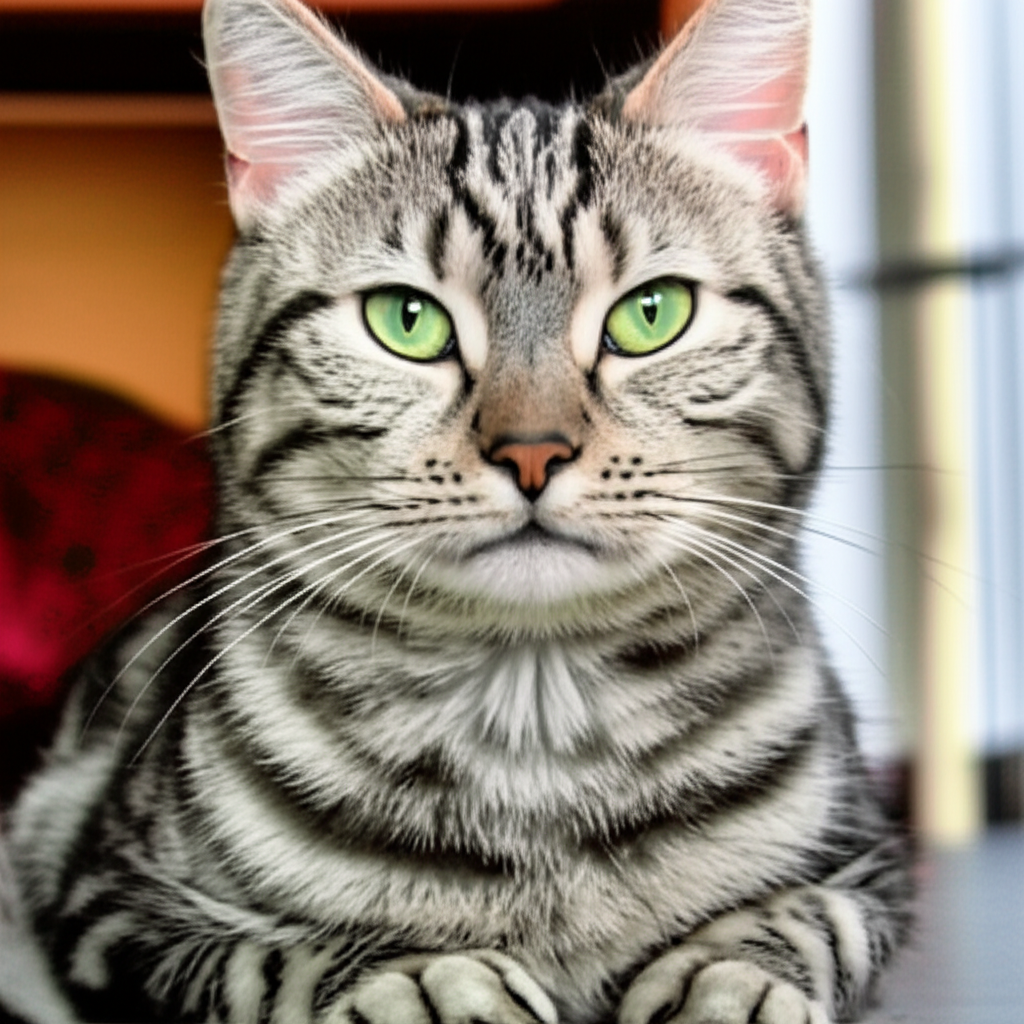

In [11]:
from PIL import Image
from io import BytesIO


prompt_text = "A photo of a cat"

response = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents=prompt_text,
    config=types.GenerateContentConfig(
      response_modalities=['TEXT', 'IMAGE']
    )
)

# Process the response
image_saved = False
for part in response.candidates[0].content.parts:
  if part.text is not None:
    print(f"Text response: {part.text}")
  elif part.inline_data is not None and part.inline_data.mime_type.startswith('image/'):
      image = Image.open(BytesIO(part.inline_data.data))
      image_filename = 'gemini_generated_image.png'
      image.save(image_filename)

image

**Image Generation Tips:**
- Be specific about style (photorealistic, illustration, cartoon, etc.)
- Include lighting and mood descriptors
- Specify composition details (close-up, wide shot, etc.)
- Mention art styles or references when relevant
- Consider aspect ratio and resolution needs

> **Note**: All generated images include a SynthID watermark for authenticity verification. More details in the [official documentation](https://ai.google.dev/gemini-api/docs/image-generation).

## 10. Text to Speech

Convert text into natural-sounding speech with controllable voice characteristics. This feature enables creating audio content, accessibility features, and interactive applications.

**TTS Capabilities:**
- Multiple voice options and styles
- Controllable pace, tone, and emotion
- Single-speaker and multi-speaker audio
- High-quality audio output
- Natural language voice direction

For this example, we'll use the `gemini-2.5-flash-preview-tts` model to generate single-speaker audio. You'll need to set the `response_modalities` to `["AUDIO"]` and provide a `SpeechConfig`.

In [ ]:
%pip install soundfile numpy

In [ ]:
import soundfile as sf
import numpy as np
from IPython.display import Audio, display

text_to_speak = "Say cheerfully: AI Eingeering Worlds Fair is the best conference in the world!"

response_tts = client.models.generate_content(
   model="gemini-2.5-flash-preview-tts", # Specific model for TTS
   contents=text_to_speak,
   config=types.GenerateContentConfig(
      response_modalities=["AUDIO"],
      speech_config=types.SpeechConfig(
         voice_config=types.VoiceConfig(
            prebuilt_voice_config=types.PrebuiltVoiceConfig(
               voice_name='Kore', # Choose from available prebuilt voices
            )
         )
      ),
   )
)

audio_array = np.frombuffer(response_tts.candidates[0].content.parts[0].inline_data.data, dtype=np.int16)
sf.write("generated_speech.wav", audio_array, 24000)
display(Audio("generated_speech.wav"))

## !! Exercise: Avatar Generation !!


Combine image generation and text-to-speech capabilities to create a visual avatar and an audio introduction for it.


1.  **Generate an Avatar Image:**
    - Write a descriptive prompt for an avatar image (e.g., "A friendly, futuristic robot assistant with a welcoming smile, digital art style, high resolution").
    - Use `client.models.generate_content()` with the model `gemini-2.0-flash-preview-image-generation`.
    - Set `response_modalities=['TEXT', 'IMAGE']` in `GenerateContentConfig`.
    - Process the response to extract the image data (from `part.inline_data.data` where `mime_type` starts with `image/`).
    - Save the image (e.g., as `generated_avatar.png`) using `PIL.Image` and `BytesIO`.
    - Display the generated image.
2.  **Create an Introduction Text:**
    - Write a short introductory sentence for your avatar (e.g., "Hello! I am Vision, your friendly AI assistant. I'm excited to help you generate amazing things!").
3.  **Generate Speech for the Introduction:**
    - Use `client.models.generate_content()` with the model `gemini-2.5-flash-preview-tts`.
    - For the `contents`, you can augment the introduction text with a description of the avatar to influence the voice (e.g., f"Say in a voice based on this image description {{your_image_prompt}}: {{your_introduction_text}}").
    - Configure `GenerateContentConfig` with `response_modalities=["AUDIO"]`.
    - Set up `speech_config` within the `GenerateContentConfig` to select a `prebuilt_voice_config` (e.g., `voice_name='Puck'`).
    - Process the response to get the audio data (from `part.inline_data.data`).
    - Convert the audio data to a NumPy array and save it as a WAV file (e.g., `avatar_introduction.wav`) using `soundfile`.
    - Provide a way to play the audio (e.g., `IPython.display.Audio`).

In [ ]:
# TODO:

## Recap & Next Steps

**What You've Learned:**
- Image understanding with single and multiple image analysis for various use cases
- Audio processing including speech transcription and audio content analysis
- Video analysis for scene understanding and YouTube content processing
- Document processing with PDF analysis and structured data extraction
- Code understanding for repository analysis and code review
- Creative generation with image creation and text-to-speech synthesis
- Multimodal integration combining different content types for rich applications
- File API usage for efficient handling of large files and reusable content

**Key Takeaways:**
- Use File API for large files (>20MB) and content you'll reuse multiple times
- Implement comprehensive error handling for network and API operations
- Structure prompts clearly and specifically for consistent, high-quality outputs
- Monitor token usage across different modalities for effective cost control
- Consider user experience and processing time for multimedia operations

**Next Steps:** Continue with [Part 3: Structured Outputs, Function Calling & Tools](https://github.com/philschmid/gemini-2.5-ai-engineering-workshop/blob/main/notebooks/03-structured-outputs-function-calling-tools.ipynb) [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/philschmid/gemini-2.5-ai-engineering-workshop/blob/main/notebooks/03-structured-outputs-function-calling-tools.ipynb)

**More Resources:**
- [Vision Understanding Documentation](https://ai.google.dev/gemini-api/docs/vision?lang=python)
- [Audio Understanding Documentation](https://ai.google.dev/gemini-api/docs/audio?lang=python)
- [Image Generation Guide](https://ai.google.dev/gemini-api/docs/image-generation)
- [Text-to-Speech Documentation](https://ai.google.dev/gemini-api/docs/speech-generation)